In [1]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import openpyxl
import matplotlib.ticker
import matplotlib.pyplot as plt

sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif')

# # drawio colors
# # 189,215,238
# # 255,230,153
# pal = sns.color_palette(['#BDD7EE', '#FFE699'])
# sns.set_palette("colorblind", 5)
sns.set_palette("gray", 5)


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [2]:
all_data = pd.DataFrame()

ZH_PATHS = [
    '/Users/minghe/llm4faas/experiments_default/functions_zh/gpt4o_functions',
    '/Users/minghe/llm4faas/experiments_default/functions_zh/gemini_functions',
    '/Users/minghe/llm4faas/experiments_default/functions_zh/llama31_functions',
    '/Users/minghe/llm4faas/experiments_default/functions_zh/4o-mini_functions',

    '/Users/minghe/llm4faas/experiments_default/functions_zh/copilot_functions/remotecontrol',
    '/Users/minghe/llm4faas/experiments_default/functions_zh/copilot_functions/autoadapt',
    '/Users/minghe/llm4faas/experiments_default/functions_zh/copilot_functions/plan',
    '/Users/minghe/llm4faas/experiments_default/functions_zh/copilot_functions/energy',

    # # Mandarin Functions
    '/Users/minghe/llm4faas/experiments_mandarin/ali_tongyi_functions/plans',
    '/Users/minghe/llm4faas/experiments_mandarin/ali_tongyi_functions/remote_control/',
    '/Users/minghe/llm4faas/experiments_mandarin/ali_tongyi_functions/energy',
    '/Users/minghe/llm4faas/experiments_mandarin/ali_tongyi_functions/auto_adapt/',
    '/Users/minghe/llm4faas/experiments_mandarin/baidu_functions/remote_control',
    '/Users/minghe/llm4faas/experiments_mandarin/baidu_functions/plans',
    '/Users/minghe/llm4faas/experiments_mandarin/baidu_functions/energy',
    '/Users/minghe/llm4faas/experiments_mandarin/baidu_functions/auto-adapt',
]

EN_PATHS = [
    '/Users/minghe/llm4faas/experiments_default/functions_en/gemini_en_functions',
    '/Users/minghe/llm4faas/experiments_default/functions_en/llama31_en_functions',
    '/Users/minghe/llm4faas/experiments_default/functions_en/4o-mini_en_functoins',
    #
    '/Users/minghe/llm4faas/experiments_default/functions_en/copilot_en_functions/auto-adapt',
    '/Users/minghe/llm4faas/experiments_default/functions_en/copilot_en_functions/energy-control',
    '/Users/minghe/llm4faas/experiments_default/functions_en/copilot_en_functions/plan',
    '/Users/minghe/llm4faas/experiments_default/functions_en/copilot_en_functions/remote-control',
    #
    '/Users/minghe/llm4faas/experiments_default/functions_en/gpt-4o_en_functions/remote-control',
    '/Users/minghe/llm4faas/experiments_default/functions_en/gpt-4o_en_functions/energy',
    '/Users/minghe/llm4faas/experiments_default/functions_en/gpt-4o_en_functions/plans',
    '/Users/minghe/llm4faas/experiments_default/functions_en/gpt-4o_en_functions/auto-adapt',

]
REPEAT_PATHS = [
    '/Users/minghe/llm4faas/experiments_repeat/repeat_functions/',
    '/Users/minghe/llm4faas/experiments_repeat/repeat_functions_4o-mini',
]

# Define a list of tuples containing the paths and corresponding languages
path_language_map = [
    (ZH_PATHS, 'ZH', 'zh_all_data.csv'),
    (EN_PATHS, 'EN', 'en_all_data.csv'),
    (REPEAT_PATHS, 'ZH', 'repeat_all_data.csv')
]

# Initialize an empty DataFrame to store combined results
all_data = pd.DataFrame()

# Loop through each set of paths and languages
for paths, language, output_file in path_language_map:
    for path in paths:
        csv_files = [file for file in os.listdir(path) if file.endswith(".csv")]
        for csv_file in csv_files:
            csv_path = os.path.join(path, csv_file)
            # Read and process each CSV file
            df = pd.read_csv(csv_path)
            df['language'] = language  # Add language column
            # Concatenate to all_data and drop rows with missing 'Model Name'
            all_data = pd.concat([all_data, df], ignore_index=True).dropna(subset=['Model Name'])
    # Save the combined DataFrame to the corresponding output file
    all_data.to_csv(output_file, index=False)
    all_data = pd.DataFrame()  # Reset all_data for the next iteration


# all_data['Model Name'].unique()
# model_names = all_data['Model Name'].unique()
#
#
# for model_name in model_names:
#     model_data = all_data[all_data['Model Name'] == model_name]
#     # the number of each model
#     print(f"{model_name}, {model_data.shape[0]}")

# all_data

In [3]:
zh_data = pd.read_csv("zh_all_data.csv")
en_data = pd.read_csv("en_all_data.csv")
repeat_data = pd.read_csv("repeat_all_data.csv")

# valid data-- remove the results from 'invalid prompt'
valid_zh_data = zh_data[zh_data['Error Status'] != 'Invalid Prompt']
valid_en_data = en_data[en_data['Error Status'] != 'Invalid Prompt']
valid_repeat_data = repeat_data[repeat_data['Error Status'] != 'Invalid Prompt']

In [4]:
def change_task_name(data):
    data.loc[: , 'Task Name'] = data['Task Name'].replace({
        "remote_control": "Easy",
        "plan": "Medium",
        "auto_adapt": "Advanced",
        "energy_control": "Complex"
    })

    data.loc[:, 'Model Name'] = data['Model Name'].replace({
        'copilot': 'Copilot',
        'openai_gpt-4o': 'GPT-4o',
        'openai_gpt-4o-mini': 'GPT-4o-mini',
        'gemini': 'Gemini',
        'llama3.1': 'Llama-3.1',
        'ali_qwen-max-0919': 'Ali-Qwen-Max',
        'zhipu_ernie-4.0-turbo-8k': 'Baidu-Qianfan',
    })

    task_order = ["Easy", "Medium", "Advanced", "Complex"]
    model_order = [ "GPT-4o", "GPT-4o-mini", "Gemini", "Copilot", "Llama-3.1", "Ali-Qwen-Max", "Baidu-Qianfan"]

    data['Task Name'] = pd.Categorical(data['Task Name'], categories=task_order, ordered=True)
    data['Model Name'] = pd.Categorical(data['Model Name'], categories=model_order, ordered=True)

    data = data.sort_values('Task Name')
    data['Success Rate (%)'] = data['Success Rate (%)'] * 100
    # print(data.shape[0])
    return data

# change_task_name(all_data)
valid_zh_data = change_task_name(valid_zh_data)
valid_en_data = change_task_name(valid_en_data)
valid_repeat_data = change_task_name(valid_repeat_data)

/var/folders/5p/qh6lc1k97596w6rjnhwmmwrc0000gn/T/ipykernel_3809/2733270786.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Task Name'] = pd.Categorical(data['Task Name'], categories=task_order, ordered=True)
/var/folders/5p/qh6lc1k97596w6rjnhwmmwrc0000gn/T/ipykernel_3809/2733270786.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Model Name'] = pd.Categorical(data['Model Name'], categories=model_order, ordered=True)
/var/folders/5p/qh6lc1k97596w6rjnhwmmwrc0000gn/T/ipykernel_3809/2733270

In [5]:
def filter_and_count(data):
    """
    Filters data into syntactic, semantic, and error subsets and returns the counts.
    """
    syntactic_data = data[data['Error Status'] != 'Error']
    semantic_data = data[data['Success Rate (%)'] == 100]
    error_data = data[data['Error Status'] == 'Error']

    return syntactic_data, semantic_data, error_data

def print_results(language, data, syntactic_data, semantic_data, error_data):
    """
    Prints the result counts for a given dataset.
    """
    print(f"{language} Results: valid: {data.shape[0]}, syntactic: {syntactic_data.shape[0]}, semantic: {semantic_data.shape[0]}, error: {error_data.shape[0]}")

# zh
syntactic_zh_data, semantic_zh_data, error_zh_data = filter_and_count(valid_zh_data)
print_results("ZH", valid_zh_data, syntactic_zh_data, semantic_zh_data, error_zh_data)

# en
syntactic_en_data, semantic_en_data, error_en_data = filter_and_count(valid_en_data)
print_results("EN", valid_en_data, syntactic_en_data, semantic_en_data, error_en_data)

# repeat
syntactic_repeat_data, semantic_repeat_data, error_repeat_data = filter_and_count(valid_repeat_data)
print_results("Repeat", valid_repeat_data, syntactic_repeat_data, semantic_repeat_data, error_repeat_data)

# ZH Results: valid: 644, syntactic: 373, semantic: 202, error: 271
# EN Results: valid: 461, syntactic: 220, semantic: 101, error: 241
# Repeat Results: valid: 240, syntactic: 197, semantic: 105, error: 43

ZH Results: valid: 644, syntactic: 373, semantic: 202, error: 271
EN Results: valid: 461, syntactic: 220, semantic: 101, error: 241
Repeat Results: valid: 240, syntactic: 197, semantic: 105, error: 43


In [6]:
syntactic_distribution_zh = valid_zh_data[(valid_zh_data['Error Status'] != 'Error') & (valid_zh_data['Success Rate (%)'] != 1)] #171
syntactic_distribution_en = valid_en_data[(valid_en_data['Error Status'] != 'Error') & (valid_en_data['Success Rate (%)'] != 1)] #119
syntactic_distribution_repeat = valid_repeat_data[(valid_repeat_data['Error Status'] != 'Error') & (valid_repeat_data['Success Rate (%)'] != 1)] #92
#
# print(f"ZH Syntactic Distribution: {syntactic_distribution_zh.shape[0]}, EN Syntactic Distribution: {syntactic_distribution_en.shape[0]}, Repeat Syntactic Distribution: {syntactic_distribution_repeat.shape[0]}")

# 定义不同模型的数据集
mandarin_models = ['GPT-4o', 'GPT-4o-mini', 'Baidu-Qianfan', 'Ali-Qwen-Max']
# openai_models = ['GPT-4o', 'GPT-4o-mini']
main_stream_models = ['GPT-4o', 'GPT-4o-mini', 'Gemini', 'Copilot', 'Llama-3.1']

mandarin_valid_zh_data = valid_zh_data[valid_zh_data['Model Name'].isin(mandarin_models)].copy()
main_stream_valid_zh_data = valid_zh_data[valid_zh_data['Model Name'].isin(main_stream_models)].copy()

mandarin_valid_en_data = valid_en_data[valid_en_data['Model Name'].isin(mandarin_models)].copy()
main_stream_valid_en_data = valid_en_data[valid_en_data['Model Name'].isin(main_stream_models)].copy()

# 合并 OpenAI 和 Mandarin 模型数据
# combined_df = pd.concat([mandarin_valid_zh_data, openai_valid_zh_data], ignore_index=True)

# 统一转换 'Model Name' 为类别型
for df in [mandarin_valid_zh_data, main_stream_valid_zh_data, mandarin_valid_en_data, main_stream_valid_en_data]:
    df['Model Name'] = df['Model Name'].astype(str)  # 转换为普通字符串
    df['Model Name'] = pd.Categorical(df['Model Name'])

main_stream_valid_zh_data['Model Name'] = pd.Categorical(main_stream_valid_zh_data['Model Name'], categories = main_stream_models, ordered= True)
mandarin_valid_zh_data['Model Name'] = pd.Categorical(mandarin_valid_zh_data['Model Name'], categories = mandarin_models, ordered= True)
main_stream_valid_en_data['Model Name'] = pd.Categorical(main_stream_valid_en_data['Model Name'], categories = main_stream_models, ordered= True)
mandarin_valid_en_data['Model Name'] = pd.Categorical(mandarin_valid_en_data['Model Name'], categories = mandarin_models, ordered= True)

# # task_names = ['Easy', 'Medium', 'Complex', 'Advanced']
#
# main_stream_valid_zh_data['Task Name'] = pd.Categorical(main_stream_valid_zh_data['Task Name'], categories = task_names, ordered= True)
# mandarin_valid_zh_data['Task Name'] = pd.Categorical(mandarin_valid_zh_data['Task Name'], categories = task_names, ordered= True)
# main_stream_valid_en_data['Task Name'] = pd.Categorical(main_stream_valid_en_data['Task Name'], categories = task_names, ordered= True)
# mandarin_valid_en_data['Task Name'] = pd.Categorical(mandarin_valid_en_data['Task Name'], categories = task_names, ordered= True)


# 画 ECDF 图的函数
def draw_ecdf(data, data_name):
    task_names = ['Easy', 'Medium', 'Advanced', 'Complex']
    for task_name in task_names:
        g = sns.ecdfplot(data=data[data['Task Name'] == task_name], x='Success Rate (%)', hue='Model Name')
        g.set_xlabel(f"Success Rate of {task_name} Task (%)")

        sns.move_legend(
            g, "upper center",
            bbox_to_anchor=(0.5, 1.3),
            ncol=7,
            title=None,
            frameon=False,
            handlelength=0.5,
            handletextpad=0.5,
            columnspacing=0.5,
            # fontsize=11
        )

        plt.savefig(f'{data_name}_ecdf_{task_name}.pdf', bbox_inches='tight')
        plt.show()

In [36]:
# 调用函数并使用 'data' 作为文件名前缀
# draw_ecdf(main_stream_valid_zh_data, "zh_mainstream")
# draw_ecdf(mandarin_valid_zh_data, 'zh_mandarin_openai')

# draw_ecdf(main_stream_valid_en_data, "en_mainstream")

/var/folders/5p/qh6lc1k97596w6rjnhwmmwrc0000gn/T/ipykernel_3809/3978140458.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valid_data_amount = valid_data.groupby(['Model Name', 'Task Name', 'language']).size().reset_index(name='counts') #.shape[0]
/var/folders/5p/qh6lc1k97596w6rjnhwmmwrc0000gn/T/ipykernel_3809/3978140458.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  syntactic_data_amount = syntactic_data.groupby(['Model Name', 'Task Name','language']).size().reset_index(name='counts')
/var/folders/5p/qh6lc1k97596w6rjnhwmmwrc0000gn/T/ipykernel_3809/3978140458.py:5: FutureWarning: The default of obser


mandarin_openai Semantic Success Rate Data:
       Model Name Task Name  Semantic Rate
0          GPT-4o      Easy          82.61
1          GPT-4o    Medium          72.73
2          GPT-4o  Advanced          57.69
3          GPT-4o   Complex          57.14
4     GPT-4o-mini      Easy          65.22
5     GPT-4o-mini    Medium          18.18
6     GPT-4o-mini  Advanced          11.54
7     GPT-4o-mini   Complex          33.33
8   Baidu-Qianfan      Easy          78.26
9   Baidu-Qianfan    Medium          31.82
10  Baidu-Qianfan  Advanced          50.00
11  Baidu-Qianfan   Complex          47.62
12   Ali-Qwen-Max      Easy          65.22
13   Ali-Qwen-Max    Medium          22.73
14   Ali-Qwen-Max  Advanced          42.31
15   Ali-Qwen-Max   Complex          42.86


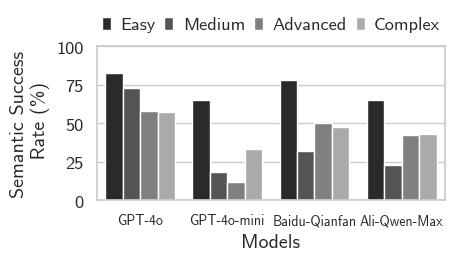


mandarin_openai Syntactic Success Rate Data:
       Model Name Task Name  Syntactic Rate
0          GPT-4o      Easy           91.30
1          GPT-4o    Medium           90.91
2          GPT-4o  Advanced           88.46
3          GPT-4o   Complex           85.71
4     GPT-4o-mini      Easy           82.61
5     GPT-4o-mini    Medium           54.55
6     GPT-4o-mini  Advanced           73.08
7     GPT-4o-mini   Complex           85.71
8   Baidu-Qianfan      Easy           91.30
9   Baidu-Qianfan    Medium           90.91
10  Baidu-Qianfan  Advanced           88.46
11  Baidu-Qianfan   Complex           85.71
12   Ali-Qwen-Max      Easy           82.61
13   Ali-Qwen-Max    Medium           77.27
14   Ali-Qwen-Max  Advanced           84.62
15   Ali-Qwen-Max   Complex           66.67


webf NOT subset; don't know how to subset; dropped


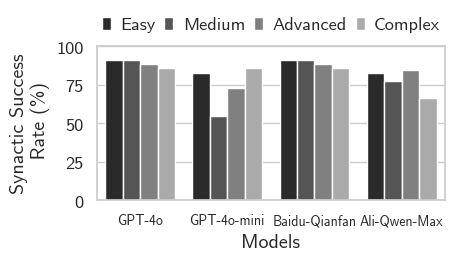

In [13]:
def calculate_success_rate_per_model_task(valid_data, semantic_data, syntactic_data):
    #     separate data by model
    valid_data_amount = valid_data.groupby(['Model Name', 'Task Name', 'language']).size().reset_index(name='counts') #.shape[0]
    syntactic_data_amount = syntactic_data.groupby(['Model Name', 'Task Name','language']).size().reset_index(name='counts')
    semantic_data_amount = semantic_data.groupby(['Model Name', 'Task Name','language']).size().reset_index(name='counts')

    # print(valid_data_amount)
    # print(semantic_data_amount)
    # print(syntactic_data_amount)

    semantic_data_amount['Semantic Rate'] = ((semantic_data_amount['counts'] / valid_data_amount['counts']) *100).round(2)
    syntactic_data_amount['Syntactic Rate'] = ((syntactic_data_amount['counts'] / valid_data_amount['counts']) *100).round(2)

    return semantic_data_amount, syntactic_data_amount

all_zh_semantic_rate = calculate_success_rate_per_model_task(valid_zh_data, semantic_zh_data, syntactic_zh_data)[0]
all_zh_syntactic_rate = calculate_success_rate_per_model_task(valid_zh_data, semantic_zh_data, syntactic_zh_data)[1]

# ZH-mainstream semantic and syntactic rate
mainstream_syntactic_zh_data, mainstream_semantic_zh_data, mainstream_error_zh_data = filter_and_count(main_stream_valid_zh_data)
# EN-mainstream semantic and syntactic rate
mainstream_syntactic_en_data, mainstream_semantic_en_data, mainstream_error_en_data = filter_and_count(main_stream_valid_en_data)

# zh results
mainstream_semantic_zh = calculate_success_rate_per_model_task(main_stream_valid_zh_data, mainstream_semantic_zh_data, mainstream_syntactic_zh_data)[0]
mainstream_syntactic_zh = calculate_success_rate_per_model_task(main_stream_valid_zh_data, mainstream_semantic_zh_data, mainstream_syntactic_zh_data)[1]

# en results
mainstream_semantic_en = calculate_success_rate_per_model_task(main_stream_valid_en_data, mainstream_semantic_en_data, mainstream_syntactic_en_data)[0]
mainstream_syntactic_en = calculate_success_rate_per_model_task(main_stream_valid_en_data, mainstream_semantic_en_data, mainstream_syntactic_en_data)[1]


# mandarin results
mandarin_syntactic_data, mandarin_semantic_data, mandarin_error_data = filter_and_count(mandarin_valid_zh_data)
mandarin_semantic_result = calculate_success_rate_per_model_task(mandarin_valid_zh_data, mandarin_semantic_data, mandarin_syntactic_data)[0]
mandarin_syntactic_result = calculate_success_rate_per_model_task(mandarin_valid_zh_data, mandarin_semantic_data, mandarin_syntactic_data)[1]


def semantic_barplot(data, name):
    # todo: en_plots
    print(f"\n{name} Semantic Success Rate Data:")
    print(data[['Model Name', 'Task Name', 'Semantic Rate']])

    g = sns.barplot(data = data, x='Model Name', y = 'Semantic Rate', hue = 'Task Name')

    g.set_xlabel("Models")
    g.set_ylabel("Semantic Success\n Rate (%)")

    sns.move_legend(
            g, "upper center",
            bbox_to_anchor=(0.5, 1.3),
            ncol=7,
            title=None,
            frameon=False,
            handlelength=0.5,
            handletextpad=0.5,
            columnspacing=0.5,
        )
    plt.xticks(fontsize=10)
    plt.yticks( [0, 25, 50, 75, 100])

    plt.savefig(f'{name}_semantic_barplot.pdf', bbox_inches='tight')
    plt.show()

def syntactic_barplot(data, name):
    print(f"\n{name} Syntactic Success Rate Data:")
    print(data[['Model Name', 'Task Name', 'Syntactic Rate']])

    h = sns.barplot(data = data, x='Model Name', y = 'Syntactic Rate', hue = 'Task Name')

    h.set_xlabel("Models")
    h.set_ylabel("Synactic Success\n Rate (%)")

    sns.move_legend(
        h, "upper center",
        bbox_to_anchor=(0.5, 1.3),
        ncol=7,
        title=None,
        frameon=False,
        handlelength=0.5,
        handletextpad=0.5,
        columnspacing=0.5,
        # fontsize=11
    )
    plt.xticks(fontsize=10)
    plt.yticks( [0, 25, 50, 75, 100])

    plt.savefig(f'{name}_syntactic_barplot.pdf', bbox_inches='tight')
    plt.show()
#
# semantic_barplot(mainstream_semantic_zh, 'zh_mainstream')
# syntactic_barplot(mainstream_syntactic_zh, 'zh_mainstream')
# #
# semantic_barplot(mainstream_semantic_en, 'en_mainstream')
# syntactic_barplot(mainstream_syntactic_en, 'en_mainstream')

#
semantic_barplot(mandarin_semantic_result, 'mandarin_openai')
syntactic_barplot(mandarin_syntactic_result, 'mandarin_openai')


webf NOT subset; don't know how to subset; dropped


GPT-4o semantic


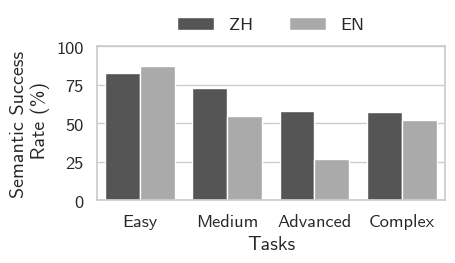

GPT-4o-mini semantic


webf NOT subset; don't know how to subset; dropped


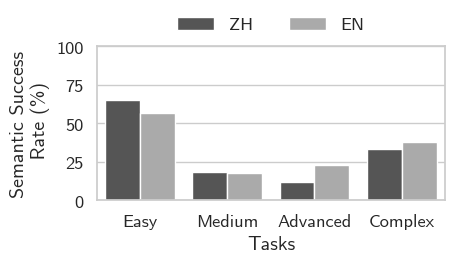

webf NOT subset; don't know how to subset; dropped


Gemini semantic


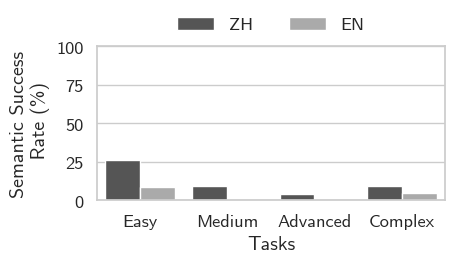

webf NOT subset; don't know how to subset; dropped


Copilot semantic


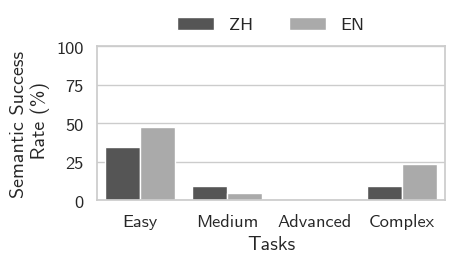

Llama-3.1 semantic


webf NOT subset; don't know how to subset; dropped


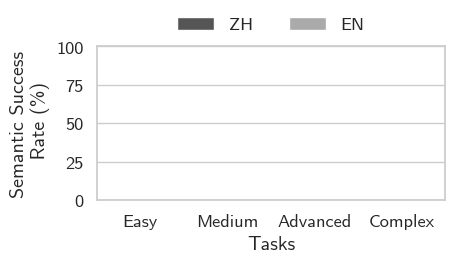

webf NOT subset; don't know how to subset; dropped


GPT-4o syntactic


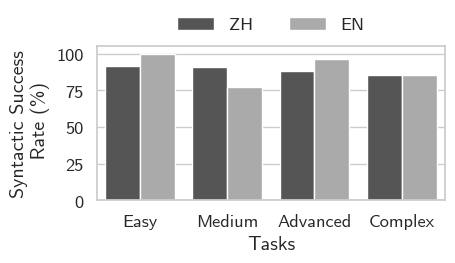

GPT-4o-mini syntactic


webf NOT subset; don't know how to subset; dropped


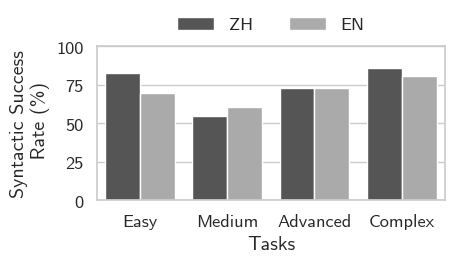

Gemini syntactic


webf NOT subset; don't know how to subset; dropped


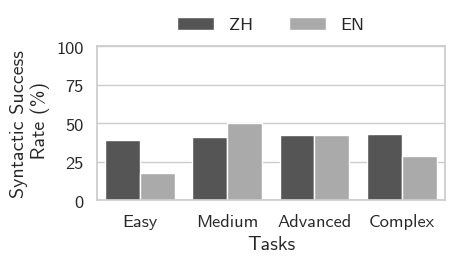

Copilot syntactic


webf NOT subset; don't know how to subset; dropped


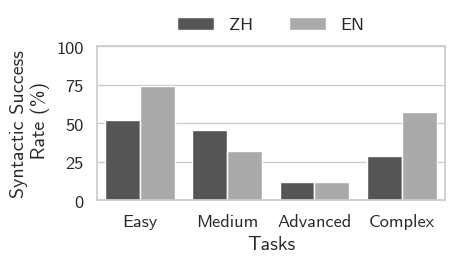

webf NOT subset; don't know how to subset; dropped


Llama-3.1 syntactic


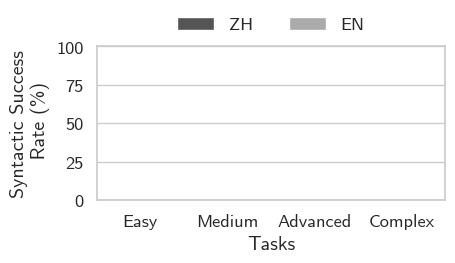

In [10]:
# language comparison

combined_mainstream_data = pd.concat([mainstream_semantic_zh, mainstream_semantic_en])
combined_mainstream_syntactic_data = pd.concat([ mainstream_syntactic_zh, mainstream_syntactic_en])
#
# print(combined_mainstream_data)
# for task_name in task_names:
#     print(task_name)
#     sns.barplot(data = combined_mainstream_data[combined_mainstream_data['Task Name'] == task_name], x='Model Name', y = 'Semantic Rate', hue = 'language')
#     plt.show()

def language_comparison_semantic(data, name):
    for model_name in main_stream_models:
        print(model_name, name)


        g = sns.barplot(data = data[data['Model Name'] == model_name], x='Task Name', y = 'Semantic Rate', hue = 'language', palette='gray')
        g.set_xlabel("Tasks")
        g.set_ylabel("Semantic Success\n Rate (%)")

        sns.move_legend(
            g, "upper center",
            bbox_to_anchor=(0.5, 1.3),
            ncol=2,
            title=None,
            frameon=False,
        )
        plt.yticks( [0, 25, 50, 75, 100])

        plt.savefig(f'{model_name}_{name}_comparison_barplot.pdf', bbox_inches='tight')
        plt.show()

def language_comparison_syntactic(data, name):
    for model_name in main_stream_models:
        print(model_name, name)
        g = sns.barplot(data = data[data['Model Name'] == model_name], x='Task Name', y = 'Syntactic Rate', hue = 'language', palette='gray')
        g.set_xlabel("Tasks")
        g.set_ylabel("Syntactic Success\n Rate (%)")

        sns.move_legend(
            g, "upper center",
            bbox_to_anchor=(0.5, 1.3),
            ncol=2,
            title=None,
            frameon=False,
        )
        plt.yticks( [0, 25, 50, 75, 100])

        plt.savefig(f'{model_name}_{name}_comparison_barplot.pdf', bbox_inches='tight')
        plt.show()


language_comparison_semantic(combined_mainstream_data, 'semantic')
language_comparison_syntactic(combined_mainstream_syntactic_data, 'syntactic')

In [28]:
    # repeat experiments

gpt_4o_repeat_valid = valid_repeat_data[valid_repeat_data['Model Name'] == 'GPT-4o']
gpt_4o_mini_repeat_valid = valid_repeat_data[valid_repeat_data['Model Name'] == 'GPT-4o-mini']

print_results('4o_repeat', gpt_4o_repeat_valid, *filter_and_count(gpt_4o_repeat_valid))
print_results('4o_mini_repeat', gpt_4o_mini_repeat_valid, *filter_and_count(gpt_4o_mini_repeat_valid))

# semantic
gpt_4o_repeat_semantic = filter_and_count(gpt_4o_repeat_valid)[1]
gpt_4o_repeat_syntactic = filter_and_count(gpt_4o_repeat_valid)[0]

# syntactic
gpt_4o_mini_repeat_semantic = filter_and_count(gpt_4o_mini_repeat_valid)[1]
gpt_4o_mini_repeat_syntactic = filter_and_count(gpt_4o_mini_repeat_valid)[0]

# overall success rate
# todo: modify legend.
# sns.barplot(data=gpt_4o_repeat_valid, x = 'Task Name', y='Success Rate (%)', hue='User Answer Index')

# gpt4o
# semantic_success = gpt_4o_repeat_valid.groupby([ 'Task Name', 'User Answer Index'])['Success Rate (%)'].apply(lambda x: (x == 100).mean()).reset_index()
# syntactic_success = gpt_4o_repeat_valid.groupby([ 'Task Name', 'User Answer Index'])['Error Status'].apply(lambda x: (x != 'Error').mean()).reset_index()

# 4o-mini
# semantic_success = gpt_4o_mini_repeat_valid.groupby([ 'Task Name', 'User Answer Index'])['Success Rate (%)'].apply(lambda x: (x == 100).mean()).reset_index()
# syntactic_success = gpt_4o_mini_repeat_valid.groupby([ 'Task Name', 'User Answer Index'])['Error Status'].apply(lambda x: (x != 'Error').mean()).reset_index()

#
# sns.barplot(syntactic_success, x = 'Task Name', y = 'Error Status', hue = 'User Answer Index', legend = False)
#
# # sns.barplot(semantic_success, x = 'Task Name', y = 'Success Rate (%)', hue = 'User Answer Index' )
# # syntactic_success
#
# semantic_success

4o_repeat Results: valid: 120, syntactic: 112, semantic: 0, error: 8
4o_mini_repeat Results: valid: 120, syntactic: 85, semantic: 0, error: 35


In [42]:
# def violin_plot(no_error_data):
#     g = sns.violinplot(data=no_error_data, x = "Task Name", y='Success Rate (%)',  hue="Task Name", legend=False)
#     # plt.savefig("gpt4o_no_error_violin.pdf", bbox_inches='tight')
#     # plt.yticks([0, 0.5, 1])
#     plt.show()
#
# # violin_plot(no_error_data)
# # violin_plot(valid_data)

In [43]:
# remote_control_data = no_error_data[no_error_data['Task Name'] == 'remote_control']
# plan_data = no_error_data[no_error_data['Task Name'] == 'plan']
# auto_adapt_data = no_error_data[no_error_data['Task Name'] == 'auto_adapt']
# energy_control_data = no_error_data[no_error_data['Task Name'] == 'energy_control']
#
# print(f"Remote Control,\n {remote_control_data['Success Rate (%)'].describe()}")
# print(f"Plan,\n {plan_data['Success Rate (%)'].describe()}")
# print(f"Auto Adapt,\n {auto_adapt_data['Success Rate (%)'].describe()}")
# print(f"Energy Control,\n {energy_control_data['Success Rate (%)'].describe()}")